# **ANÁLISE 1 - ENTREGA**

![](https://media.giphy.com/media/oenruB2DKC7p6/giphy.gif)

In [145]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median
import statistics 


# Loading the dataset

In [3]:
netflix_overall=pd.read_csv("netflix_titles.csv")

In [4]:
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

## Contagem do total de atores 

In [5]:
from collections import Counter


netflix_movies = netflix_movies.dropna(axis=0)
cast = netflix_movies['cast']


actors = []
temp = []


for i in cast:
    temp = i.split(",")
    for name in temp:
        actors.append(name)
        
actors_unique = Counter(actors).keys()  
print("atores sem repetição:",len(actors_unique))
print("atores com repetição:", len(actors))
#Counter(actors).values()



atores sem repetição: 19519
atores com repetição: 28508


In [6]:
netflix_movies = netflix_movies.reset_index(drop=True)

### Dividir os filmes por ano

In [7]:
netflix_movies['added_2017'] = False
netflix_movies['added_2018'] = False
netflix_movies['added_2019'] = False
for i in range(0, len(netflix_movies)):
    if (netflix_movies['date_added'][i][-4:] == '2017'):
        netflix_movies['added_2017'][i] = True
    else:
        netflix_movies['added_2017'][i] = False

for i in range(0, len(netflix_movies)):
    if (netflix_movies['date_added'][i][-4:] == '2018'):
        netflix_movies['added_2018'][i] = True
    else:
        netflix_movies['added_2018'][i] = False

for i in range(0, len(netflix_movies)):
    if (netflix_movies['date_added'][i][-4:] == '2019'):
        netflix_movies['added_2019'][i] = True
    else:
        netflix_movies['added_2019'][i] = False

C:\Users\giova\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\giova\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\giova\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\giova\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 

In [8]:
netflix_movies_2017 = netflix_movies[netflix_movies.added_2017 == True]
netflix_movies_2018 = netflix_movies[netflix_movies.added_2018 == True]
netflix_movies_2019 = netflix_movies[netflix_movies.added_2019 == True]

genre_2017 = netflix_movies_2017['listed_in']
genre_count_2017 = pd.Series(dict(Counter(','.join(genre_2017).replace(' ,',',').replace(', ',',')
                                    .split(',')))).sort_values(ascending=False)

genre_2018 = netflix_movies_2018['listed_in']
genre_count_2018 = pd.Series(dict(Counter(','.join(genre_2018).replace(' ,',',').replace(', ',',')
                                    .split(',')))).sort_values(ascending=False)

genre_2019 = netflix_movies_2019['listed_in']
genre_count_2019 = pd.Series(dict(Counter(','.join(genre_2019).replace(' ,',',').replace(', ',',')
                                    .split(',')))).sort_values(ascending=False)

In [83]:
# GMP 

genre_count_2017

International Movies        407
Dramas                      326
Comedies                    206
Independent Movies          126
Action & Adventure          116
Documentaries                98
Thrillers                    75
Romantic Movies              70
Children & Family Movies     66
Stand-Up Comedy              57
Music & Musicals             44
Horror Movies                36
Sports Movies                25
Sci-Fi & Fantasy             20
Anime Features               15
LGBTQ Movies                 11
Classic Movies                9
Cult Movies                   4
Faith & Spirituality          3
Movies                        2
dtype: int64

In [10]:
actors_and_genres2017 = netflix_movies_2017.iloc[:, [4, 10]]
actors_and_genres2018 = netflix_movies_2018.iloc[:, [4, 10]]
actors_and_genres2019 = netflix_movies_2019.iloc[:, [4, 10]]

In [11]:
actors_and_genres2017

cast  \
1     Nesta Cooper, Kate Walsh, John Michael Higgins...   
2     Antonio Banderas, Dylan McDermott, Melanie Gri...   
3                                       Fabrizio Copano   
4     James Franco, Kate Hudson, Tom Wilkinson, Omar...   
5     Jim Sturgess, Sam Worthington, Ryan Kwanten, A...   
...                                                 ...   
3670  Abbie Cornish, Diego Klattenhoff, Justin Long,...   
3671  Shashi Kapoor, Sulakshana Pandit, Mehmood, Sud...   
3672  Ana Polvorosa, Candela Peña, Macarena Gómez, C...   
3673  Alan Sabbagh, Julieta Zylberberg, Usher Barilk...   
3674  Mario Casas, Luis Tosar, José Sacristán, Claud...   

                                              listed_in  
1                                              Comedies  
2     International Movies, Sci-Fi & Fantasy, Thrillers  
3                                       Stand-Up Comedy  
4                         Action & Adventure, Thrillers  
5      Action & Adventure, Dramas, International Movies  
...                                                 ...  
3670            Dramas, International Movies, Thrillers  
3671  Action & Adventure, International Movies, Musi...  
3672                       Dramas, International Movies  
3673                       Dramas, International Movies  
3674            Dramas, International Movies, Thrillers  

[778 rows x 2 columns]

### Selecionar apenas gênero e atores por ano

In [12]:
network_2017_temp_actor = pd.concat([pd.Series(row['cast'], row['listed_in'].split(','))              
                    for _, row in actors_and_genres2017.iterrows()]).reset_index()

network_2017_temp_actor = network_2017_temp_actor.rename(columns={'index': 'categoria', 0: 'ator'})

network_2017_actor = pd.concat([pd.Series(row["categoria"], row['ator'].split(','))              
                    for _, row in network_2017_temp_actor.iterrows()]).reset_index()

network_2017_actor = network_2017_actor.rename(columns={'index': 'ator', 0: 'categoria'})

network_2017_actor

ator   categoria
0                Nesta Cooper    Comedies
1                  Kate Walsh    Comedies
2        John Michael Higgins    Comedies
3                Keith Powers    Comedies
4                 Alicia Sanz    Comedies
...                       ...         ...
13207          José Sacristán   Thrillers
13208           Claudia Canal   Thrillers
13209        José Manuel Poga   Thrillers
13210   Ingrid García Jonsson   Thrillers
13211           Luichi Macías   Thrillers

[13212 rows x 2 columns]

In [13]:
actor_genre_2017 = network_2017_actor.groupby('ator')['categoria'].apply(list).reset_index(name='genero')

actor_genre_2017    

ator                                             genero
0                  AJ Bowen       [Dramas,  Independent Movies,  LGBTQ Movies]
1              Aabhas Yadav  [Children & Family Movies,  Dramas,  Music & M...
2      Aaditya Pratap Singh  [Dramas,  Independent Movies,  International M...
3            Aakash Dabhade  [Action & Adventure,  Comedies,  International...
4               Aamir Ahmed  [Dramas,  International Movies,  Music & Music...
...                     ...                                                ...
4816                Zendaya              [Children & Family Movies,  Comedies]
4817           Zezé Polessa         [Comedies,  Dramas,  International Movies]
4818            Zizan Razak  [Comedies,  Horror Movies,  International Movies]
4819            Àlex Monner                    [Dramas,  International Movies]
4820          Álvaro Ogalla         [Comedies,  Dramas,  International Movies]

[4821 rows x 2 columns]

In [14]:
## GA

actor_2017 = netflix_movies_2017['cast']
actor_count_2017 = pd.Series(dict(Counter(','.join(actor_2017).replace(' ,',',').replace(', ',',')
                                    .split(',')))).sort_values(ascending=False)

actor_count_2017 = actor_count_2017.to_frame()

actor_count_2017.reset_index(level = 0, inplace = True)
actor_count_2017 = actor_count_2017.rename(columns={'index': 'ator', 0: 'GA'})

actor_count_2017['EA'] = actor_count_2017['GA'].apply(lambda x: 1/x)


variables = actor_count_2017.set_index('ator').join(actor_genre_2017.set_index('ator'))

variables.dropna()

GA        EA  \
ator                             
Shah Rukh Khan    14  0.071429   
Samuel West       11  0.090909   
Demet Akbağ        9  0.111111   
Akshay Kumar       8  0.125000   
Naseeruddin Shah   7  0.142857   
...               ..       ...   
Vinessa Shaw       1  1.000000   
Sonia Braga        1  1.000000   
Joel Courtney      1  1.000000   
Addison Timlin     1  1.000000   
Flavio Medina      1  1.000000   

                                                             genero  
ator                                                                 
Shah Rukh Khan    [Action & Adventure,  Dramas,  International M...  
Samuel West       [Documentaries,  International Movies, Documen...  
Demet Akbağ       [Comedies,  International Movies, Comedies,  I...  
Akshay Kumar      [Dramas,  International Movies,  Thrillers, In...  
Naseeruddin Shah  [Dramas,  Independent Movies,  International M...  
...                                                             ...  
Vinessa Shaw                            [Horror Movies,  Thrillers]  
Sonia Braga                         [Dramas,  International Movies]  
Joel Courtney                         [Dramas,  Independent Movies]  
Addison Timlin             [Comedies,  Dramas,  Independent Movies]  
Flavio Medina     [Dramas,  International Movies,  Romantic Movies]  

[658 rows x 3 columns]

In [15]:
network_2017_temp = pd.concat([pd.Series(row['listed_in'], row['cast'].split(','))              
                    for _, row in actors_and_genres2017.iterrows()]).reset_index()

network_2017_temp = network_2017_temp.rename(columns={'index': 'ator', 0: 'categoria'})

network_2017 = pd.concat([pd.Series(row["ator"], row['categoria'].split(','))              
                    for _, row in network_2017_temp.iterrows()]).reset_index()

network_2017 = network_2017.rename(columns={'index': 'categoria', 0: 'ator'})

### Limpando caractéres especiais

In [16]:
import unidecode


for i in range(len(network_2017['ator'])):
    if "'" in network_2017['ator'][i]:
        network_2017['ator'][i] = network_2017['ator'][i].replace("'", "")
    if '"' in network_2017['ator'][i]:
        network_2017['ator'][i] = network_2017['ator'][i].replace('"', "")
        
    network_2017['ator'][i] = unidecode.unidecode(network_2017['ator'][i])
    



### Código para criar o arquivo GML

In [140]:
import freeman as fm
import io

nodes1 = list(set(network_2017['ator']))
nodes2 = list(set(network_2017['categoria']))

temp_cat = []
temp_ator = []
temp_ator2 = []
edgeCheck = {}
listweights = []

with io.open("./network2.gml", "w") as f:
    f.write('graph [\n')
    f.write('  directed 0\n')

    for i in range(len(network_2017['ator'])):
        if not network_2017['ator'][i] in temp_ator:
            f.write('  node [\n')
            f.write('    id "{}"\n'.format(network_2017['ator'][i]))
            f.write('  ]\n')
            temp_ator.append(network_2017['ator'][i])
        
    for i in range(len(network_2017['categoria'])):
        if not network_2017['categoria'][i] in temp_cat:
            f.write('  node [\n')
            f.write('    id "{}"\n'.format(network_2017['categoria'][i]))
            f.write('  ]\n')
            temp_cat.append(network_2017['categoria'][i])
            
    for index, row in network_2017.iterrows():
        if row['categoria'][0] == ' ':
            keytemp = row['ator'] + ',' + row['categoria'][1:]
        else:
            keytemp = row['ator'] + ',' + row['categoria']
        
        if keytemp in edgeCheck:
            edgeCheck[keytemp] += 1
        else:
            edgeCheck[keytemp] = 1
            
    for key in edgeCheck:
        ator, categoria = key.split(',')
        weight = edgeCheck[key]
        if weight > 1:
            temp_ator2.append(ator)
            listweights.append(weight)
        
        f.write('  edge [\n')
        f.write('    source "{}"\n'.format(ator))
        f.write('    target "{}"\n'.format(categoria))
        f.write('    weight {}\n'.format(weight))
        f.write('  ]\n')  

    f.write(']\n')
        

In [141]:
edgeCheck

{'Nesta Cooper,Comedies': 1,
 ' Kate Walsh,Comedies': 1,
 ' John Michael Higgins,Comedies': 1,
 ' Keith Powers,Comedies': 1,
 ' Alicia Sanz,Comedies': 1,
 ' Jake Borelli,Comedies': 1,
 ' Kid Ink,Comedies': 1,
 ' Yousef Erakat,Comedies': 1,
 ' Rebekah Graf,Comedies': 1,
 ' Anne Winters,Comedies': 1,
 ' Peter Gilroy,Comedies': 1,
 ' Patrick Davis,Comedies': 1,
 'Antonio Banderas,International Movies': 1,
 'Antonio Banderas,Sci-Fi & Fantasy': 1,
 'Antonio Banderas,Thrillers': 1,
 ' Dylan McDermott,International Movies': 1,
 ' Dylan McDermott,Sci-Fi & Fantasy': 1,
 ' Dylan McDermott,Thrillers': 1,
 ' Melanie Griffith,International Movies': 1,
 ' Melanie Griffith,Sci-Fi & Fantasy': 1,
 ' Melanie Griffith,Thrillers': 1,
 ' Birgitte Hjort Sorensen,International Movies': 3,
 ' Birgitte Hjort Sorensen,Sci-Fi & Fantasy': 1,
 ' Birgitte Hjort Sorensen,Thrillers': 3,
 ' Robert Forster,International Movies': 1,
 ' Robert Forster,Sci-Fi & Fantasy': 1,
 ' Robert Forster,Thrillers': 2,
 ' Christa Camp

In [116]:
g = fm.load('network2.gml')

In [93]:
length = len(listweights)
middle_index = length//2

first_half = listweights[:middle_index]

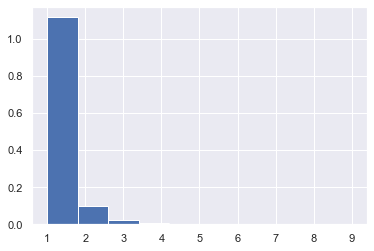

In [111]:
plt.hist(first_half, density = True)
plt.show()

### Criando a rede

In [95]:
g.label_nodes()
g.set_all_nodes(size=5, labpos='hover')
g.set_all_edges(color=(0, 0, 0, 0.5))

In [50]:
g.draw()

Calculando a centralidade degree dos nós:

In [51]:
import networkx as nx
nx.degree_centrality(g)

{'Nesta Cooper': 0.00020614306328592042,
 ' Kate Walsh': 0.00020614306328592042,
 ' John Michael Higgins': 0.0008245722531436817,
 ' Keith Powers': 0.00020614306328592042,
 ' Alicia Sanz': 0.00020614306328592042,
 ' Jake Borelli': 0.00020614306328592042,
 ' Kid Ink': 0.00020614306328592042,
 ' Yousef Erakat': 0.00020614306328592042,
 ' Rebekah Graf': 0.00020614306328592042,
 ' Anne Winters': 0.00020614306328592042,
 ' Peter Gilroy': 0.00020614306328592042,
 ' Patrick Davis': 0.00020614306328592042,
 'Antonio Banderas': 0.0008245722531436817,
 ' Dylan McDermott': 0.0006184291898577612,
 ' Melanie Griffith': 0.0006184291898577612,
 ' Birgitte Hjort Sorensen': 0.0010307153164296021,
 ' Robert Forster': 0.0010307153164296021,
 ' Christa Campbell': 0.0006184291898577612,
 ' Tim McInnerny': 0.0006184291898577612,
 ' Andy Nyman': 0.0010307153164296021,
 ' David Ryall': 0.0006184291898577612,
 'Fabrizio Copano': 0.00020614306328592042,
 'James Franco': 0.0008245722531436817,
 ' Kate Hudson': 0

## Visualização dos nós

In [52]:
g.number_of_nodes()

4852

In [53]:
g.number_of_edges()

11977

In [54]:
import networkx as nx

nx.density(g)

0.0010177145379123944

In [96]:
def load():
    g = fm.load('network2.gml')

    # Remover todas as arestas com peso menor ou igual a 0.5.
    # Precisamos de dois loops, pois não é uma boa ideia
    # tirar algo de um conjunto enquanto iteramos nele.
    removed = []
    for n, m in g.edges:
        if g.edges[n, m]['weight'] <= 2:
            removed.append((n, m))
    for n, m in removed:
        g.remove_edge(n, m)

    # Remover todos os nós que ficaram isolados depois da
    # remoção das arestas, para melhorar a visualização.
    removed = []
    for n in g.nodes:
        if not g.degree(n):
            removed.append(n)
    for n in removed:
        g.remove_node(n)

    return g

## Transformando em uma one-mode

In [118]:
#Construindo a rede one-mode do zero:
g1 = fm.Graph(nx.Graph())

In [119]:
#Adicionando todos os nós de usuário à rede one-mode:
for n in temp_ator2:
    g1.add_node(n)

In [120]:
from itertools import combinations
for n, m in combinations(g1.nodes, 2):

    # Muito cuidado para não usar g1 aqui!
    # Estamos analisando os vizinhos em g2.
    repos_n = set(g.neighbors(n))
    repos_m = set(g.neighbors(m))

    # Em sets é fácil calcular intersecção.
    weight = len(repos_n & repos_m)

    # Adicionamos só se weight for positivo.
    if weight > 0:
        g1.add_edge(n, m)
        g1.edges[n, m]['weight'] = weight

In [121]:
isolated = [n for n in g1.nodes if g1.degree(n) == 0]

for n in isolated:
    g1.remove_node(n)

In [122]:
weights = [g1.edges[n, m]['weight'] for n, m in g1.edges]

In [123]:
max(weights)

8

In [124]:
nx.write_gml(g1,'one_mode.gml')

## Métricas 

In [125]:
# CA (r) 

cluster = nx.clustering(g1)

In [126]:
cluster

{' Birgitte Hjort Sorensen': 0.9270070921985816,
 ' Robert Forster': 0.9519669637035427,
 ' Thomas Cocquerel': 0.9254029226415869,
 ' Louis Cancelmi': 0.9428892275607604,
 ' Kevin Bishop': 0.9227664884135472,
 ' Connie Nielsen': 0.9385673758865248,
 ' Peter Fonda': 0.9584533113944879,
 ' Alice Pol': 0.9243227806788512,
 ' So-ri Moon': 0.9296864207763503,
 ' Matthias Schoenaerts': 0.9541573444134971,
 ' Carmen Machi': 0.9387943262411348,
 ' Secun de la Rosa': 0.9387943262411348,
 ' Terele Pavez': 0.9387943262411348,
 ' Joaquin Climent': 0.9296864207763503,
 ' Keanu Reeves': 0.9325010639807065,
 ' Zoe Kravitz': 0.9836311617653957,
 ' Jason Mitchell': 0.9467467155276598,
 'Erica Lindbeck': 1.0,
 ' Shannon Chan-Kent': 0.6526732673267327,
 ' Kazumi Evans': 1.0,
 ' Claire Corlett': 1.0,
 ' Adrian Petriw': 1.0,
 ' Maryke Hendrikse': 1.0,
 ' Garry Chalk': 1.0,
 ' Nayyar Ejaz': 0.9243227806788512,
 ' Eddie J. Fernandez': 0.9170605583161637,
 ' Luis Gatica': 0.9170605583161637,
 'Vinod Khanna': 

In [143]:
edgeCheck_genero = {}


for key in edgeCheck:
    ator, categoria = key.split(',')
    if ator in cluster.keys():
        edgeCheck_genero[key] = cluster[ator]



In [144]:
cluster_international = []
cluster_drama = []
cluster_comedies = []
cluster_independent = []
cluster_action = []
cluster_documentaries = []
cluster_thrillers = []
cluster_romantic = []
cluster_children = []
cluster_stand_up = []
cluster_music = []
cluster_horror = []
cluster_sports = []
cluster_scifi = []
cluster_anime = []
cluster_LGBTQ = []
cluster_classic = []
cluster_cult = []
cluster_faith = []
cluster_movies = []

for key in edgeCheck_genero:
    ator, categoria = key.split(',')
    if categoria == genre_count_2017.keys()[0]:
        cluster_international.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[1]:
        cluster_drama.append(edgeCheck_genero[key]) 
        
    elif categoria == genre_count_2017.keys()[2]:
        cluster_comedies.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[3]:
        cluster_independent.append(edgeCheck_genero[key]) 
        
    elif categoria == genre_count_2017.keys()[4]:
        cluster_action.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[5]:
        cluster_documentaries.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[6]:
        cluster_thrillers.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[7]:
        cluster_romantic.append(edgeCheck_genero[key])
    
    elif categoria == genre_count_2017.keys()[8]:
        cluster_children.append(edgeCheck_genero[key]) 
        
    elif categoria == genre_count_2017.keys()[9]:
        cluster_stand_up.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[10]:
        cluster_music.append(edgeCheck_genero[key]) 
        
    elif categoria == genre_count_2017.keys()[11]:
        cluster_horror.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[12]:
        cluster_sports.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[13]:
        cluster_scifi.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[14]:
        cluster_anime.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[15]:
        cluster_LGBTQ.append(edgeCheck_genero[key]) 
        
    elif categoria == genre_count_2017.keys()[16]:
        cluster_classic.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[17]:
        cluster_cult.append(edgeCheck_genero[key]) 
        
    elif categoria == genre_count_2017.keys()[18]:
        cluster_faith.append(edgeCheck_genero[key])
        
    elif categoria == genre_count_2017.keys()[19]:
        cluster_movies.append(edgeCheck_genero[key])
    
    else:
        print("deu errado", key)

In [150]:
print(cluster_stand_up)

[]


In [152]:
cluster_international_mean = statistics.mean(cluster_international)
cluster_drama_mean = statistics.mean(cluster_drama)
cluster_comedies_mean = statistics.mean(cluster_comedies)
cluster_independent_mean = statistics.mean(cluster_independent)
cluster_action_mean = statistics.mean(cluster_action)
cluster_documentaries_mean = statistics.mean(cluster_documentaries)
cluster_thrillers_mean = statistics.mean(cluster_thrillers)
cluster_romantic_mean = statistics.mean(cluster_romantic)
cluster_children_mean = statistics.mean(cluster_children)
cluster_stand_up_mean = 0
# = statistics.mean(cluster_stand_up)
cluster_music_mean = statistics.mean(cluster_music)
cluster_horror_mean = statistics.mean(cluster_horror)
cluster_sports_mean = statistics.mean(cluster_sports)
cluster_scifi_mean = statistics.mean(cluster_scifi)
cluster_anime_mean = statistics.mean(cluster_anime)
cluster_LGBTQ_mean = statistics.mean(cluster_LGBTQ)
cluster_classic_mean = statistics.mean(cluster_classic)
cluster_cult_mean = statistics.mean(cluster_cult)
cluster_faith_mean = statistics.mean(cluster_faith)
cluster_movies_mean = statistics.mean(cluster_movies)

In [66]:
# identificando os atores que tem relação entre si

for n in g1.nodes:
    for m in g1.neighbors(n):
        if cluster[n] == 1:
            print(n, m)

Nesta Cooper  Kate Walsh
Nesta Cooper  John Michael Higgins
Nesta Cooper  Keith Powers
Nesta Cooper  Alicia Sanz
Nesta Cooper  Jake Borelli
Nesta Cooper  Kid Ink
Nesta Cooper  Yousef Erakat
Nesta Cooper  Rebekah Graf
Nesta Cooper  Anne Winters
Nesta Cooper  Peter Gilroy
Nesta Cooper  Patrick Davis
Nesta Cooper  Birgitte Hjort Sorensen
Nesta Cooper Tom OBrien
Nesta Cooper  Katherine Waterston
Nesta Cooper  Caitlin Fitzgerald
Nesta Cooper  Gaby Hoffmann
Nesta Cooper  Louis Cancelmi
Nesta Cooper  Zach Grenier
Nesta Cooper  Kevin Bishop
Nesta Cooper  Alice Pol
Nesta Cooper Bel Powley
Nesta Cooper  Nathan Lane
Nesta Cooper  Vanessa Bayer
Nesta Cooper  Gabriel Byrne
Nesta Cooper  Jason Ritter
Nesta Cooper  Colin ODonoghue
Nesta Cooper  William Moseley
Nesta Cooper  Desmin Borges
Nesta Cooper  So-ri Moon
Nesta Cooper  Judy Greer
Nesta Cooper Lyndon Ogbourne
Nesta Cooper  Billy Zane
Nesta Cooper  Billy Boyd
Nesta Cooper  Joel Dommett
Nesta Cooper  Elliot Gleave
Nesta Cooper  Gala Gordon
Nesta 

 Jake Borelli  Tom Green
 Jake Borelli Blanca Suarez
 Jake Borelli  Mario Casas
 Jake Borelli  Carmen Machi
 Jake Borelli  Secun de la Rosa
 Jake Borelli  Jaime Ordonez
 Jake Borelli  Terele Pavez
 Jake Borelli  Joaquin Climent
 Jake Borelli  Alejandro Awada
 Jake Borelli Fan Bingbing
 Jake Borelli  Guo Tao
 Jake Borelli  Da Peng
 Jake Borelli  Zhang Jiayi
 Jake Borelli  Yu Hewei
 Jake Borelli  Yi Zhao
 Jake Borelli  Zonghan Li
 Jake Borelli  Zhao Lixin
 Jake Borelli  Tian Xiaojie
 Jake Borelli  Yin Yuanzhang
 Jake Borelli  Enhe Feng
 Jake Borelli  Xin Liu
 Jake Borelli  Jiang Yongbo
 Jake Borelli  Emory Cohen
 Jake Borelli  Zoey Deutch
 Jake Borelli Armeena Rana Khan
 Jake Borelli  Bilal Ashraf
 Jake Borelli  Ali Rehman Khan
 Jake Borelli  Hania Aamir
 Jake Borelli  Usman Mukhtar
 Jake Borelli  Nayyar Ejaz
 Jake Borelli  Shammi Kapoor
 Jake Borelli  Rakesh Bedi
 Jake Borelli  Helen
 Jake Borelli Adam Scott
 Jake Borelli  Evangeline Lilly
 Jake Borelli  Bridget Everett
 Jake Borelli  O

 Anne Winters  Hania Aamir
 Anne Winters  Usman Mukhtar
 Anne Winters  Nayyar Ejaz
 Anne Winters  Shammi Kapoor
 Anne Winters  Rakesh Bedi
 Anne Winters  Helen
 Anne Winters Adam Scott
 Anne Winters  Evangeline Lilly
 Anne Winters  Bridget Everett
 Anne Winters  Owen Atlas
 Anne Winters  Chris DElia
 Anne Winters  Donald Faison
 Anne Winters  Clancy Brown
 Anne Winters  Tyler Labine
 Anne Winters  Kyle Bornheimer
 Anne Winters  Carla Gallo
 Anne Winters  Brad Williams
 Anne Winters  Sally Field
 Anne Winters  Kanchan Mullick
 Anne Winters  Kharaj Mukherjee
 Anne Winters Sanjeev Kumar
 Anne Winters  Zeenat Aman
 Anne Winters  Dev Kumar
 Anne Winters  Madan Puri
 Anne Winters  Paintal
 Anne Winters  Asit Kumar Sen
 Anne Winters  Agha
 Anne Winters  Murad
 Anne Winters  Shefali
 Anne Winters  Sharat Saxena
 Anne Winters Oscar Martinez
 Anne Winters  Dady Brieva
 Anne Winters  Andrea Frigerio
 Anne Winters  Nora Navas
 Anne Winters  Manuel Vicente
 Anne Winters  Belen Chavanne
 Anne Winter

 J.B. Smoove  Mike Epps
 J.B. Smoove  Sheryl Underwood
 J.B. Smoove  Tracy Morgan
 J.B. Smoove  Deon Cole
 J.B. Smoove Jerry Seinfeld
 J.B. Smoove Jeff Dunham
 Joe Torry Fabrizio Copano
 Joe Torry Marc Maron
 Joe Torry Dave Chappelle
 Joe Torry  Steve Harvey
 Joe Torry  Cedric the Entertainer
 Joe Torry  Martin Lawrence
 Joe Torry  Tiffany Haddish
 Joe Torry  Katt Williams
 Joe Torry  Craig Robinson
 Joe Torry  D.L. Hughley
 Joe Torry  Eddie Griffin
 Joe Torry  J.B. Smoove
 Joe Torry  Kid Capri
 Joe Torry  Mike Epps
 Joe Torry  Sheryl Underwood
 Joe Torry  Tracy Morgan
 Joe Torry  Deon Cole
 Joe Torry Jerry Seinfeld
 Joe Torry Jeff Dunham
 Kid Capri Fabrizio Copano
 Kid Capri Marc Maron
 Kid Capri Dave Chappelle
 Kid Capri  Steve Harvey
 Kid Capri  Cedric the Entertainer
 Kid Capri  Martin Lawrence
 Kid Capri  Tiffany Haddish
 Kid Capri  Katt Williams
 Kid Capri  Craig Robinson
 Kid Capri  D.L. Hughley
 Kid Capri  Eddie Griffin
 Kid Capri  J.B. Smoove
 Kid Capri  Joe Torry
 Kid Capri  

Sreymoch Sareum  Ruben Santiago-Hudson
Sreymoch Sareum  James Murtaugh
Sreymoch Sareum  Ato Essandoh
Sreymoch Sareum  Toby Poser
Sreymoch Sareum  Diane Kagan
Sreymoch Sareum  John Di Benedetto
Sreymoch Sareum  Jerry Matz
Sreymoch Sareum  Lisa Emery
Sreymoch Sareum Rajiv Kapoor
Sreymoch Sareum  Divya Rana
Sreymoch Sareum  Shammi Kapoor
Sreymoch Sareum  Tanuja
Sreymoch Sareum  Kiran Vairale
Sreymoch Sareum  Rakesh Bedi
Sreymoch Sareum  Monty Sharma
Sreymoch Sareum  Rekha
Sreymoch Sareum  Helen
Sreymoch Sareum Prasenjit Chatterjee
Sreymoch Sareum  Payel Sarkar
Sreymoch Sareum  Indrasish Roy
Sreymoch Sareum  Kanchan Mullick
Sreymoch Sareum  Kharaj Mukherjee
Sreymoch Sareum  Gargi Roychowdhury
Sreymoch Sareum  Deepankar De
Sreymoch Sareum  Biswajit Chakraborty
Sreymoch Sareum  Bharat Kaul
Sreymoch Sareum  Rajat Ganguly
Sreymoch Sareum Mithun Chakraborty
Sreymoch Sareum  Suresh Oberoi
Sreymoch Sareum  Shakti Kapoor
Sreymoch Sareum  Amrish Puri
Sreymoch Sareum  David Schutter
Sreymoch Sareum 

 Dara Heng  Carlo Brandt
 Dara Heng  Camelia Montassere
 Dara Heng  Carmen Machi
 Dara Heng  Secun de la Rosa
 Dara Heng  Terele Pavez
 Dara Heng  Joaquin Climent
 Dara Heng Suki Waterhouse
 Dara Heng  Jason Momoa
 Dara Heng  Keanu Reeves
 Dara Heng  Jim Carrey
 Dara Heng  Giovanni Ribisi
 Dara Heng  Yolonda Ross
 Dara Heng Emile Hirsch
 Dara Heng  Zoe Kravitz
 Dara Heng  Emory Cohen
 Dara Heng  Zoey Deutch
 Dara Heng  Beau Knapp
 Dara Heng  Jason Mitchell
 Dara Heng  Scott Mescudi
 Dara Heng  Jeff Gum
 Dara Heng  Joey Bicicchi
 Dara Heng Sreymoch Sareum
 Dara Heng  Kompheak Phoeung
 Dara Heng  Socheata Sveng
 Dara Heng  Sothea Khoun
 Dara Heng  Sreyneang Oun
 Dara Heng  Kimhak Mun
 Dara Heng  Chenda Run
 Dara Heng  Nika Sarun
 Dara Heng  Nita Sarun
 Dara Heng Yaroslav Zhalnin
 Dara Heng  Mikhail Filippov
 Dara Heng  Olga Ivanova
 Dara Heng  Vadim Michman
 Dara Heng  Vladimir Steklov
 Dara Heng  Viktor Proskurin
 Dara Heng  Nadezhda Markina
 Dara Heng  Daniil Vorobyov
 Dara Heng  Nayya

 Kimhak Mun Zeenat Aman
 Kimhak Mun  Pran
 Kimhak Mun  Poonam Dhillon
 Kimhak Mun  Andrea Frigerio
 Kimhak Mun  Julia Stiles
 Kimhak Mun  Avan Jogia
 Kimhak Mun Leonardo Sbaraglia
 Kimhak Mun  Daniel Hendler
 Kimhak Mun  Angela Molina
 Kimhak Mun  Alian Devetac
 Kimhak Mun  Pablo Cedron
 Kimhak Mun  Alejandra Flechner
 Chenda Run  John Michael Higgins
 Chenda Run  Robert Forster
 Chenda Run  Andy Nyman
 Chenda Run James Franco
 Chenda Run  Thomas Cocquerel
 Chenda Run Nicolas Cage
 Chenda Run  Sarah Paulson
 Chenda Run  Connie Nielsen
 Chenda Run  Wendell Pierce
 Chenda Run  Bryan Batt
 Chenda Run  Peter Fonda
 Chenda Run  Dana Gourrier
 Chenda Run Guillaume Canet
 Chenda Run  Guillaume Gallienne
 Chenda Run  Alice Pol
 Chenda Run  Deborah Francois
 Chenda Run  Sabine Azema
 Chenda Run  Freya Mavor
 Chenda Run  Isabelle Candelier
 Chenda Run  Laurent Stocker
 Chenda Run Nathanael Wiseman
 Chenda Run  Mem Ferda
 Chenda Run  Alexandra Newick
 Chenda Run  Oliver Stark
 Chenda Run  Kat Gel

Dolph Lundgren  Toa Yukinari
Dolph Lundgren  Yuki Kaji
Dolph Lundgren  Minako Kotobuki
Dolph Lundgren  Takahiro Fujiwara
Dolph Lundgren  Yoshiro Matsumoto
Dolph Lundgren  Kazuki Yao
Dolph Lundgren  Aki Toyosaki
Dolph Lundgren  Rikiya Koyama
Dolph Lundgren  Kenta Miyake
Dolph Lundgren  Nobuyuki Katsube
Dolph Lundgren  Houchu Ohtsuka
Dolph Lundgren  Takayuki Sugo
Dolph Lundgren  Yuichi Nakamura
Dolph Lundgren  Akio Otsuka
Dolph Lundgren  Tanuja
Dolph Lundgren Kappei Yamaguchi
Dolph Lundgren  Satsuki Yukino
Dolph Lundgren  Koji Tsujitani
Dolph Lundgren  Houko Kuwashima
Dolph Lundgren  Kumiko Watanabe
Dolph Lundgren  Noriko Hidaka
Dolph Lundgren  Ken Narita
Dolph Lundgren  Cho
Dolph Lundgren  Mamiko Noto
Dolph Lundgren  Nobutoshi Canna
Dolph Lundgren  Fumiko Orikasa
Dolph Lundgren  Richard Ian Cox
Dolph Lundgren  Moneca Stori
Dolph Lundgren  Kikuko Inoue
Dolph Lundgren  Kenichi Ogata
Dolph Lundgren  Toshiyuki Morikawa
Dolph Lundgren  Mieko Harada
Dolph Lundgren Danny Denzongpa
Dolph Lundgr

 Louis Mandylor  Akio Otsuka
 Louis Mandylor  Tanuja
 Louis Mandylor Kappei Yamaguchi
 Louis Mandylor  Satsuki Yukino
 Louis Mandylor  Koji Tsujitani
 Louis Mandylor  Houko Kuwashima
 Louis Mandylor  Kumiko Watanabe
 Louis Mandylor  Noriko Hidaka
 Louis Mandylor  Ken Narita
 Louis Mandylor  Cho
 Louis Mandylor  Mamiko Noto
 Louis Mandylor  Nobutoshi Canna
 Louis Mandylor  Fumiko Orikasa
 Louis Mandylor  Richard Ian Cox
 Louis Mandylor  Moneca Stori
 Louis Mandylor  Kikuko Inoue
 Louis Mandylor  Kenichi Ogata
 Louis Mandylor  Toshiyuki Morikawa
 Louis Mandylor  Mieko Harada
 Louis Mandylor Danny Denzongpa
 Louis Mandylor  Mahendra Sandhu
 Louis Mandylor  Rekha
 Louis Mandylor  Faryal
 Louis Mandylor  Helen
 Louis Mandylor  Jagdeep
 Louis Mandylor  Madan Puri
 Louis Mandylor Mithun Chakraborty
 Louis Mandylor  Madhuri Dixit
 Louis Mandylor  Suresh Oberoi
 Louis Mandylor  Shakti Kapoor
 Louis Mandylor  Pallavi Joshi
 Louis Mandylor  Amrish Puri
 Louis Mandylor  Nutan
 Louis Mandylor  Shar

 Mauricio Mendoza  Tanuja
 Mauricio Mendoza Kappei Yamaguchi
 Mauricio Mendoza  Satsuki Yukino
 Mauricio Mendoza  Koji Tsujitani
 Mauricio Mendoza  Houko Kuwashima
 Mauricio Mendoza  Kumiko Watanabe
 Mauricio Mendoza  Noriko Hidaka
 Mauricio Mendoza  Ken Narita
 Mauricio Mendoza  Cho
 Mauricio Mendoza  Mamiko Noto
 Mauricio Mendoza  Nobutoshi Canna
 Mauricio Mendoza  Fumiko Orikasa
 Mauricio Mendoza  Richard Ian Cox
 Mauricio Mendoza  Moneca Stori
 Mauricio Mendoza  Kikuko Inoue
 Mauricio Mendoza  Kenichi Ogata
 Mauricio Mendoza  Toshiyuki Morikawa
 Mauricio Mendoza  Mieko Harada
 Mauricio Mendoza Danny Denzongpa
 Mauricio Mendoza  Mahendra Sandhu
 Mauricio Mendoza  Rekha
 Mauricio Mendoza  Faryal
 Mauricio Mendoza  Helen
 Mauricio Mendoza  Jagdeep
 Mauricio Mendoza  Madan Puri
 Mauricio Mendoza Mithun Chakraborty
 Mauricio Mendoza  Madhuri Dixit
 Mauricio Mendoza  Suresh Oberoi
 Mauricio Mendoza  Shakti Kapoor
 Mauricio Mendoza  Pallavi Joshi
 Mauricio Mendoza  Amrish Puri
 Mauricio M

### Teste de hipótese (teste-t)

teste t entre total de filmes de um gênero lançados no ano e a média do cluster coefficient do mesmo gênero

In [182]:
cluster_mean = []
cluster_mean.extend((cluster_international_mean, cluster_drama_mean,cluster_comedies_mean,cluster_independent_mean, 
                     cluster_action_mean, cluster_documentaries_mean, cluster_thrillers_mean, cluster_romantic_mean, 
                     cluster_children_mean, cluster_stand_up_mean, cluster_music_mean, cluster_horror_mean, cluster_sports_mean,
                     cluster_scifi_mean, cluster_anime_mean, cluster_LGBTQ_mean, cluster_classic_mean, cluster_cult_mean, 
                     cluster_faith_mean, cluster_movies_mean))

print(cluster_mean)
movies_count = []
for i in range(0, len(genre_count_2017)):
    movies_count.append(genre_count_2017[i])


[0.934393256753093, 0.9217017133141173, 0.9144472202773297, 0.9187639690090273, 0.9286839154259217, 0.9638885533960636, 0.9318299621278131, 0.9251723506354103, 0.8364723338181399, 0, 0.8615993507532199, 0.9429870012808752, 0.9151554686069266, 0.8629697893477111, 0.9824861924389077, 0.9363065234238832, 0.9319751368025032, 0.893143817504859, 0.9519669637035427, 0.8955197132616487]


In [183]:
from scipy.stats import ttest_ind
from scipy import stats



ttest_ind(cluster_mean, movies_count)

Ttest_indResult(statistic=-3.4602682421791817, pvalue=0.0013480811061727404)